# 3.3 模型的實作

### 共通處理

In [ ]:
# 取得中文字型
!wget 'https://github.com/flyingpath/electron-hand-dicom/raw/master/TaipeiSansTCBeta-Regular.ttf'

--2021-12-22 11:04:44--  https://github.com/flyingpath/electron-hand-dicom/raw/master/TaipeiSansTCBeta-Regular.ttf
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/flyingpath/electron-hand-dicom/master/TaipeiSansTCBeta-Regular.ttf [following]
--2021-12-22 11:04:44--  https://raw.githubusercontent.com/flyingpath/electron-hand-dicom/master/TaipeiSansTCBeta-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf.1’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2021-12-22 11:04:4

In [ ]:
# 共通事前處理

# 隱藏不必要的警告
import warnings
warnings.filterwarnings('ignore')

# 匯入必要的套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 將字型新增到 matplotlib
fm.fontManager.addfont('./TaipeiSansTCBeta-Regular.ttf')

# 用來顯示資料框的函式
from IPython.display import display

# 調整顯示選項
# NumPy 的浮點數表示精度, 預設是 8 位小數, 此處設為 4
np.set_printoptions(suppress=True, precision=4)
# pandas 中的浮點數表示精度
pd.options.display.float_format = '{:.4f}'.format
# 顯示資料框中的所有項目
pd.set_option("display.max_columns",None)
# 指定圖形的預設字體大小
plt.rcParams["font.size"] = 14
# 指定圖形的預設字型
plt.rcParams['font.family'] = 'Taipei Sans TC Beta'
# 使用固定的隨機種子, 每次執行結果才會與書上相同
random_seed = 123

### 乳癌資料集

[UCI資料集網站](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

#### 分析資料影像
<img src="https://www.researchgate.net/profile/Nick_Street/publication/2512520/figure/fig2/AS:279373199495169@1443619169198/Snakes-After-Convergence-to-Cell-Nucleus-Boundaries-These-contours-are-the-nal.png" alt="Drawing" width="40%" align="left">


### 3.3.1 (1) 載入資料

In [ ]:
# 載入乳癌資料集

# 匯入套件提供的函式, 可直接載入資料集
from sklearn.datasets import load_breast_cancer

# 載入資料
cancer = load_breast_cancer()

# 讀取資料註釋
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
# 匯入資料框

columns = [
    '半徑_平均值', '紋理_平均值', '周長_平均值', '面積_平均值',
    '平滑度_平均值', '緊密度_平均值', '凹面_平均值',
    '凹點_平均值', '對稱性_平均值', '分形維度_平均值',
    '半徑_標準誤差', '紋理_標準誤差', '周長_標準誤差',
    '面積_標準誤差', '平滑度_標準誤差',
    '緊密度_標準誤差', '凹面_標準誤差', '凹點_標準誤差',
    '對稱性_標準誤差', '分形維度_標準誤差',
    '半徑_最大值', '紋理_最大值', '周長_最大值', '面積_最大值',
    '平滑度_最大值', '緊密度_最大值', '凹面_最大值', '凹點_最大值',
    '對稱性_最大值', '分形維度_最大值'
]

# 將載入的資料匯入資料框
df = pd.DataFrame(cancer.data, columns=columns)

# 取得標準答案
y = pd.Series(cancer.target)

### 3.3.2 (2) 確認資料

In [ ]:
# 顯示輸入資料

# 顯示輸入資料開頭的第 20 至 24 行
display(df[20:25])

,半徑_平均值,紋理_平均值,周長_平均值,面積_平均值,平滑度_平均值,緊密度_平均值,凹面_平均值,凹點_平均值,對稱性_平均值,分形維度_平均值,半徑_標準誤差,紋理_標準誤差,周長_標準誤差,面積_標準誤差,平滑度_標準誤差,緊密度_標準誤差,凹面_標準誤差,凹點_標準誤差,對稱性_標準誤差,分形維度_標準誤差,半徑_最大值,紋理_最大值,周長_最大值,面積_最大值,平滑度_最大值,緊密度_最大值,凹面_最大值,凹點_最大值,對稱性_最大值,分形維度_最大值
20,13.0800,15.7100,85.6300,520.0000,0.1075,0.1270,0.0457,0.0311,0.1967,0.0681,0.1852,0.7477,1.3830,14.6700,0.0041,0.0190,0.0170,0.0065,0.0168,0.0024,14.5000,20.4900,96.0900,630.5000,0.1312,0.2776,0.1890,0.0728,0.3184,0.0818
21,9.5040,12.4400,60.3400,273.9000,0.1024,0.0649,0.0296,0.0208,0.1815,0.0691,0.2773,0.9768,1.9090,15.7000,0.0096,0.0143,0.0198,0.0142,0.0203,0.0030,10.2300,15.6600,65.1300,314.9000,0.1324,0.1148,0.0887,0.0623,0.2450,0.0777
22,15.3400,14.2600,102.5000,704.4000,0.1073,0.2135,0.2077,0.0976,0.2521,0.0703,0.4388,0.7096,3.3840,44.9100,0.0068,0.0533,0.0645,0.0225,0.0367,0.0044,18.0700,19.0800,125.1000,980.9000,0.1390,0.5954,0.6305,0.2393,0.4667,0.0995
23,21.1600,23.0400,137.2000,1404.0000,0.0943,0.1022,0.1097,0.0863,0.1769,0.0528,0.6917,1.1270,4.3030,93.9900,0.0047,0.0126,0.0171,0.0104,0.0108,0.0020,29.1700,35.5900,188.0000,2615.0000,0.1401,0.2600,0.3155,0.2009,0.2822,0.0753
24,16.6500,21.3800,110.0000,904.6000,0.1121,0.1457,0.1525,0.0917,0.1995,0.0633,0.8068,0.9017,5.4550,102.6000,0.0060,0.0188,0.0274,0.0113,0.0147,0.0028,26.4600,31.5600,177.0000,2215.0000,0.1805,0.3578,0.4695,0.2095,0.3613,0.0956


In [ ]:
# 顯示標準答案

# 顯示標準答案的第 20 到 24 列
print(y[20:25])

20    1
21    1
22    0
23    0
24    0
dtype: int64


In [ ]:
# 確認資料的統計資訊

# 確認輸入資料的列數與行數
print(df.shape)
print()

# 確認標準答案中 1 與 0 的個數
print(y.value_counts())

(569, 30)

1    357
0    212
dtype: int64


In [ ]:
# 繪製散佈圖的事前準備
# 將資料分割為標準答案 = 0 之群組與標準答案 = 1 之群組

# 提取標準答案= 0（惡性）之資料
df0 = df[y==0]

# 提取標準答案= 1（良性）之資料
df1 = df[y==1]

display(df0.head())
display(df1.head())

,半徑_平均值,紋理_平均值,周長_平均值,面積_平均值,平滑度_平均值,緊密度_平均值,凹面_平均值,凹點_平均值,對稱性_平均值,分形維度_平均值,半徑_標準誤差,紋理_標準誤差,周長_標準誤差,面積_標準誤差,平滑度_標準誤差,緊密度_標準誤差,凹面_標準誤差,凹點_標準誤差,對稱性_標準誤差,分形維度_標準誤差,半徑_最大值,紋理_最大值,周長_最大值,面積_最大值,平滑度_最大值,緊密度_最大值,凹面_最大值,凹點_最大值,對稱性_最大值,分形維度_最大值
0,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768


,半徑_平均值,紋理_平均值,周長_平均值,面積_平均值,平滑度_平均值,緊密度_平均值,凹面_平均值,凹點_平均值,對稱性_平均值,分形維度_平均值,半徑_標準誤差,紋理_標準誤差,周長_標準誤差,面積_標準誤差,平滑度_標準誤差,緊密度_標準誤差,凹面_標準誤差,凹點_標準誤差,對稱性_標準誤差,分形維度_標準誤差,半徑_最大值,紋理_最大值,周長_最大值,面積_最大值,平滑度_最大值,緊密度_最大值,凹面_最大值,凹點_最大值,對稱性_最大值,分形維度_最大值
19,13.5400,14.3600,87.4600,566.3000,0.0978,0.0813,0.0666,0.0478,0.1885,0.0577,0.2699,0.7886,2.0580,23.5600,0.0085,0.0146,0.0239,0.0132,0.0198,0.0023,15.1100,19.2600,99.7000,711.2000,0.1440,0.1773,0.2390,0.1288,0.2977,0.0726
20,13.0800,15.7100,85.6300,520.0000,0.1075,0.1270,0.0457,0.0311,0.1967,0.0681,0.1852,0.7477,1.3830,14.6700,0.0041,0.0190,0.0170,0.0065,0.0168,0.0024,14.5000,20.4900,96.0900,630.5000,0.1312,0.2776,0.1890,0.0728,0.3184,0.0818
21,9.5040,12.4400,60.3400,273.9000,0.1024,0.0649,0.0296,0.0208,0.1815,0.0691,0.2773,0.9768,1.9090,15.7000,0.0096,0.0143,0.0198,0.0142,0.0203,0.0030,10.2300,15.6600,65.1300,314.9000,0.1324,0.1148,0.0887,0.0623,0.2450,0.0777
37,13.0300,18.4200,82.6100,523.8000,0.0898,0.0377,0.0256,0.0292,0.1467,0.0586,0.1839,2.3420,1.1700,14.1600,0.0044,0.0049,0.0134,0.0116,0.0267,0.0018,13.3000,22.8100,84.4600,545.9000,0.0970,0.0462,0.0483,0.0501,0.1987,0.0617
46,8.1960,16.8400,51.7100,201.9000,0.0860,0.0594,0.0159,0.0059,0.1769,0.0650,0.1563,0.9567,1.0940,8.2050,0.0090,0.0165,0.0159,0.0059,0.0257,0.0026,8.9640,21.9600,57.2600,242.2000,0.1297,0.1357,0.0688,0.0256,0.3105,0.0741


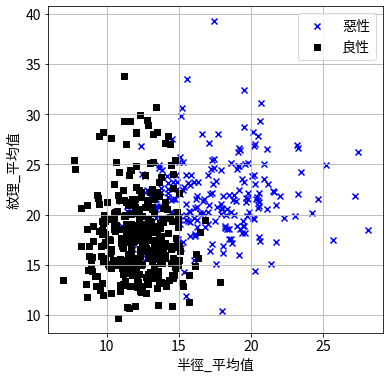

In [ ]:
# 繪製散佈圖

# 設定圖形大小
plt.figure(figsize=(6,6))

# 將目標變數為 0 的資料繪製於散佈圖
plt.scatter(df0['半徑_平均值'], df0['紋理_平均值'], marker='x',
    c='b', label='惡性')

# 將目標變數為 1 的資料繪製於散佈圖
plt.scatter(df1['半徑_平均值'], df1['紋理_平均值'], marker='s',
    c='k', label='良性')

# 顯示網格
plt.grid()

# 顯示標籤
plt.xlabel('半徑_平均值')
plt.ylabel('紋理_平均值')

# 顯示圖例
plt.legend()

# 繪製圖形
plt.show()

### 3.3.3 (3) 預處理資料

In [ ]:
# 將輸入資料縮減至 2 個項目

input_columns = ['半徑_平均值', '紋理_平均值']
x = df[input_columns]
display(x.head())

,半徑_平均值,紋理_平均值
0,17.9900,10.3800
1,20.5700,17.7700
2,19.6900,21.2500
3,11.4200,20.3800
4,20.2900,14.3400


### 3.3.4 (4) 分割資料

In [ ]:
# 訓練資料與驗證資料的分割

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
    train_size=0.7, test_size=0.3, random_state=random_seed)

In [ ]:
# 確認分割結果（元素數）

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 2)
(171, 2)
(398,)
(171,)


In [ ]:
# 確認分割結果（資料內容）

display(x_train.head())
display(x_test.head())
display(y_train.head())
display(y_test.head())

,半徑_平均值,紋理_平均值
559,11.5100,23.9300
295,13.7700,13.2700
264,17.1900,22.0700
125,13.8500,17.2100
280,19.1600,26.6000


,半徑_平均值,紋理_平均值
333,11.2500,14.7800
273,9.7420,15.6700
201,17.5400,19.3200
178,13.0100,22.2200
85,18.4600,18.5200


559    1
295    1
264    0
125    1
280    0
dtype: int64

333    1
273    1
201    0
178    1
85     0
dtype: int64

### 3.3.5 (5) 選擇演算法

In [ ]:
# 選擇演算法

from sklearn.linear_model import LogisticRegression
algorithm = LogisticRegression(random_state=random_seed)

### 3.3.6 (6) 訓練

In [ ]:
# 訓練

algorithm.fit(x_train, y_train)
print(algorithm)
#algorithm.get_params()

LogisticRegression(random_state=123)


### 3.3.7 (7) 預測

In [ ]:
# 預測

# 呼叫 predict 函式
y_pred = algorithm.predict(x_test)

# 確認結果
print(y_pred)

[1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1
 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0
 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1]


### 3.3.8 (8) 評估

In [ ]:
# 比較標準答案與預測結果

# 標準答案 前 10 筆
# 由於 y_test 為 Series，因此利用 values 將其轉換成 NumPy
y_test10 = y_test[:10].values
print(y_test10)

# 預測結果　前 10 筆
y_pred10 = y_pred[:10]
print(y_pred10)

[1 1 0 1 0 1 1 0 1 1]
[1 1 0 1 0 1 1 1 1 1]


In [ ]:
# 計算正確答案的數量

# 標準答案 = 預測結果
w1 = (y_test10 == y_pred10)
print(w1)

# 標準答案的數量
w2 = w1.sum()
print(w2)

[ True  True  True  True  True  True  True False  True  True]
9


In [ ]:
# 計算正確率

# 計算正確答案的數量
w = (y_test.values == y_pred)
correct = w.sum()

# 計算驗證資料的總數
N = len(w)

# 正確率 = ( 正確答案數量 ) / ( 驗證資料總數 )
score = correct / N

# 顯示結果
print(f'正確率: {score:.04f}')

正確率: 0.8772


In [ ]:
# 使用 score 函式

# 其實只要使用 score 函式便能輕鬆計算出正確率
score = algorithm.score(x_test, y_test)
print(f'score: {score:.04f}')

score: 0.8772


### 3.3.9 (9) 調整

In [ ]:
# 提高模型正確率

# 利用含有 30 個項目的原始輸入資料重新建立訓練資料與驗證資料
x2_train, x2_test, y_train, y_test = train_test_split(df, y, 
    train_size=0.7, test_size=0.3, random_state=random_seed)

# 重新建立邏輯斯迴歸模型的實例
algorithm2 = LogisticRegression(random_state=random_seed)

# 利用訓練資料進行訓練
algorithm2.fit(x2_train, y_train)

# 利用驗證資料確認正確率
score2 = algorithm2.score(x2_test, y_test)
print(f'score: {score2:.04f}')

score: 0.9649


## (補充) 繪製最佳決策邊界
以下的 cell 中含有繪製最佳決策邊界的原始碼與實作方式的簡單說明。

因內容難度較高，對 Python 還不熟悉的讀者可以跳過不看沒有關係。

對 Python 實作有興趣的讀者，則歡迎做為參考。

### 邏輯斯迴歸的內部結構

邏輯斯迴歸模型會在內部進行以下處理。  
(1) 將輸入變數代入線性函數，以導出實數值  
(2) 將 (1) 得到的線性函數值代入 sigmoid 函數，以計算 P 值（機率值）。  
(3) 將 (2) 得到的結果與 0.5 比較大小，以判斷預測結果應為 1 或 0。  

(1) 中所需的線性函數斜率與截距，可分別透過變數 coef_ 與 intercept_ 取得。  
以下原始碼會利用此特性取得內部變數值。    

此模型適用於多類別分類，可儲存多個內部變數，因此其陣列為 2 維陣列。  
但由於本次使用的是二元分類，因此只會使用到第 1 個元素（[0]）的值。  

### 取得內部變數值

In [ ]:
# 取得模型內部變數（截距與係數）

# x1 與 x2 之係數
w1 = algorithm.coef_[0][0]
w2 = algorithm.coef_[0][1]

# 截距之值
w0 = algorithm.intercept_[0]

# 確認值
print(f'w0 = {w0:.4f}  w1 = {w1:.4f}  w2 = {w2:.4f}')

w0 = 19.6195  w1 = -1.0275  w2 = -0.2151


### boundary 函式之定義

只要利用此處取得的 w0, w1, w2 之值，即可定義在散佈圖上繪製最佳決策邊界之 boundary 函式。  
具體函式與推導式如以下 cell 所示。  

In [ ]:
# 用於計算最佳決策邊界之函式

# 用於計算最佳決策邊界之函式
# 對 0 = w0 + w1 * x + w2 * y 求解 y，可得下式
# y = -(w0 + w1 * x)/ w2

def boundary(algorithm, x):
    w1 = algorithm.coef_[0][0]
    w2 = algorithm.coef_[0][1]
    w0 = algorithm.intercept_[0]
    y = -(w0 + w1 * x)/w2
    return y

### 計算最佳決策邊界之端點值

接下來的原始碼會使用以上定義的 boundary 函式來求出最佳決策邊界的端點座標。  
並從原始資料框中求出 y 的最小值與最大值，使圖形更美觀。  

In [ ]:
# 計算最佳決策邊界之端點值

# 最佳決策邊界之端點的 x 座標
x_range = np.array((df['半徑_平均值'].min(), df['半徑_平均值'].max()))

# 最佳決策邊界之端點的 y 座標
y_range = boundary(algorithm, x_range)

# 根據散佈圖中的點決定 y 的上、下限
y_lim = (df['紋理_平均值'].min(), df['紋理_平均值'].max())

# 確認結果
print('端點的 x 座標: ', x_range)
print('端點的 y 座標: ', y_range)
print('圖形的 y 範圍: ', y_lim)

端點的 x 座標:  [ 6.981 28.11 ]
端點的 y 座標:  [ 57.8637 -43.0655]
圖形的 y 範圍:  (9.71, 39.28)


### 繪製散佈圖與最佳決策邊界

現在一切都準備就緒了。  
接下來的原始碼會將原始碼 3-8 中訓練資料的散佈圖，與剛才得到的最佳決策邊界重疊起來。

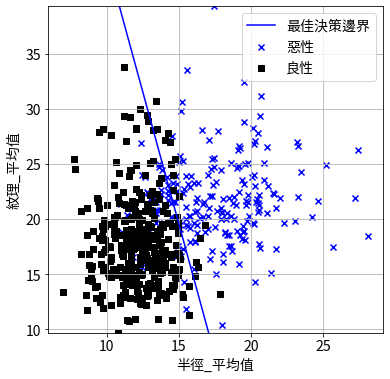

In [ ]:
# 繪製散佈圖與最佳決策邊界

# 設定圖形大小
plt.figure(figsize=(6,6))

# 將目標變數為 0 的資料繪製於散佈圖
plt.scatter(df0['半徑_平均值'], df0['紋理_平均值'], marker='x', c='b', label='惡性')

# 將目標變數為 1 的資料繪製於散佈圖
plt.scatter(df1['半徑_平均值'], df1['紋理_平均值'], marker='s', c='k', label='良性')

# 最佳決策邊界
plt.plot(x_range, y_range, c='b', label='最佳決策邊界')

# 指定範圍
plt.ylim(y_lim)

# 顯示標籤
plt.xlabel('半徑_平均值')
plt.ylabel('紋理_平均值')

# 顯示圖例
plt.legend()

# 顯示網格
plt.grid ()

# 繪製圖形
plt.show()